## Mushroom Dataset (Binary Classification)
Binary Classification of mushrooms into edible and poisonous.  
https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/code

In [25]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from neural_network.functions.activation_functions import ReLU, Sigmoid
from neural_network.functions.loss_functions import BCELoss

from neural_network.neural_network import NeuralNetwork

import matplotlib.pyplot as plt

from tqdm.auto import tqdm

## Step 1: Load the data

In [26]:
# Create the dataframe and view it

df = pd.read_csv('./../data/mushroom_cleaned.csv')

In [27]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


## Step 2: Data Preprocessing

In [29]:
# Split the data into data and target
data = df.drop('class', axis=1)
target = df['class']

# Convert to numpy arrays
data = data.to_numpy()
target = target.to_numpy()

In [30]:
print('Data Shape:', data.shape)
print('Target Shape:', target.shape)

print('data[0]:', data[0])
print('target[0]:', target[0])

Data Shape: (54035, 8)
Target Shape: (54035,)
data[0]: [1372.            2.            2.           10.            3.80746675
 1545.           11.            1.80427271]
target[0]: 1


In [31]:
# Check for missing values
print('Missing values in data:', pd.isnull(data).sum().sum())
print('Missing values in target:', pd.isnull(target).sum().sum())

Missing values in data: 0
Missing values in target: 0


In [32]:
# Standardize the data
scaler = StandardScaler().fit(data)
data = scaler.transform(data)

print('data[0]:', data[0])

data[0]: [ 2.23613935 -0.92586356 -0.06373657  0.83446694  4.68284504  0.63157015
  0.79150827  2.78840159]


In [33]:
# Split the data into training and testing sets
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
y_train, y_test = train_test_split(target, test_size=0.2, random_state=42)

## Step 3: Create the Model
The model will output a value between 0 and 1, which will classify the mushroom as edible or poisonous.  
0 -- Edible  
1 -- Poisonous

In [34]:
# Choose model hyperparameters
layer_sizes = [data.shape[1], 16, 1]
activations = [ReLU(), Sigmoid()]  # Sigmoid activation for binary classification
loss_function = BCELoss()  # Binary Cross Entropy Loss for binary classification

# Create the model
model = NeuralNetwork(layer_sizes, activations, loss_function)

In [35]:
# Choose training hyperparameters
learning_rate = 0.01
regularization_rate = 0.01
momentum = 0.9
epochs = 100

## Step 4: Train the Model

In [36]:
# Store loss and accuracy for visualization
train_loss, test_loss = [], []
train_accuracy, test_accuracy = [], []

# Training loop
for epoch in tqdm(range(epochs)):
    # Train Data
    train_loss_val, train_correct_count = 0, 0
    
    for x, y in zip(X_train, y_train):
        # Forward pass
        y_pred = model.forward(x)
        y_pred = y_pred[0]  # y_pred is a 1x1 array, convert it to a scalar
        
        # Calculate loss
        loss = model.get_loss(y, y_pred)
        train_loss_val += loss
        
        # Calculate accuracy
        train_correct_count += int((y_pred > 0.5) == y)
        
        # Backward pass
        model.backward(y)
        
        # Update weights
        model.apply_gradients(learning_rate, regularization_rate, momentum)
        
    # Calculate average loss and accuracy
    train_loss.append(train_loss_val / len(X_train))
    train_accuracy.append(train_correct_count / len(X_train))
    
    # Test Data
    test_loss_val, test_correct_count = 0, 0
    
    for x, y in zip(X_test, y_test):
        # Forward pass
        y_pred = model.forward(x, learn=False)
        y_pred = y_pred[0]  # y_pred is a 1x1 array, convert it to a scalar
        
        # Calculate loss
        loss = model.get_loss(y, y_pred)
        test_loss_val += loss
        
        # Calculate accuracy
        test_correct_count += int((y_pred > 0.5) == y)
        
    # Calculate average loss and accuracy
    test_loss.append(test_loss_val / len(X_test))
    test_accuracy.append(test_correct_count / len(X_test))
    
    # Print epoch results
    if (epoch + 1) % 10 == 0 or epoch == 0:
        print(f'Epoch {epoch + 1} --- Train Loss: {train_loss[-1]:.4f}, Test Loss: {test_loss[-1]:.4f}, Train Accuracy: {train_accuracy[-1]:.4f}, Test Accuracy: {test_accuracy[-1]:.4f}')

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1 --- Train Loss: 12.6312, Test Loss: 12.5665, Train Accuracy: 0.4504, Test Accuracy: 0.4542
Epoch 10 --- Train Loss: 12.6651, Test Loss: 12.5665, Train Accuracy: 0.4500, Test Accuracy: 0.4542
Epoch 20 --- Train Loss: 12.6651, Test Loss: 12.5665, Train Accuracy: 0.4500, Test Accuracy: 0.4542
Epoch 30 --- Train Loss: 12.6651, Test Loss: 12.5665, Train Accuracy: 0.4500, Test Accuracy: 0.4542
Epoch 40 --- Train Loss: 12.6651, Test Loss: 12.5665, Train Accuracy: 0.4500, Test Accuracy: 0.4542
Epoch 50 --- Train Loss: 12.6651, Test Loss: 12.5665, Train Accuracy: 0.4500, Test Accuracy: 0.4542
Epoch 60 --- Train Loss: 12.6651, Test Loss: 12.5665, Train Accuracy: 0.4500, Test Accuracy: 0.4542
Epoch 70 --- Train Loss: 12.6651, Test Loss: 12.5665, Train Accuracy: 0.4500, Test Accuracy: 0.4542
Epoch 80 --- Train Loss: 12.6651, Test Loss: 12.5665, Train Accuracy: 0.4500, Test Accuracy: 0.4542
Epoch 90 --- Train Loss: 12.6651, Test Loss: 12.5665, Train Accuracy: 0.4500, Test Accuracy: 0.4542
E

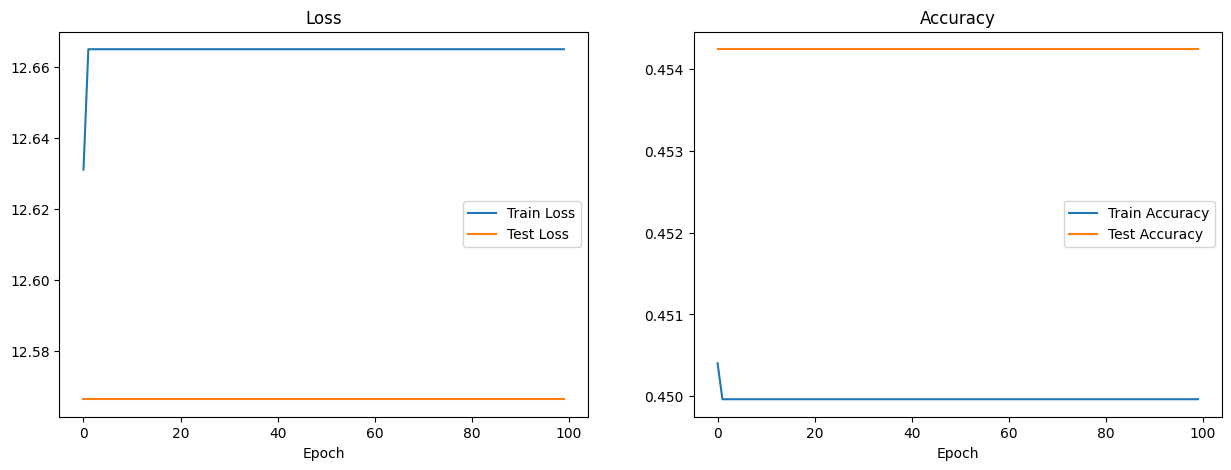

In [38]:
# Plot the loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Loss
ax[0].plot(train_loss, label='Train Loss')
ax[0].plot(test_loss, label='Test Loss')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Accuracy
ax[1].plot(train_accuracy, label='Train Accuracy')
ax[1].plot(test_accuracy, label='Test Accuracy')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()